In [2]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


# load data

In [109]:
# sims = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_1000_simulationruns_results.csv'),
#                  pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_2000_simulationruns_results.csv')])
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_8144runs.csv')
# sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_18208runs.csv')
print len(sims),'runs in the sample'

4275 runs in the sample


In [110]:
sims=sims[sims.parameters_reconstructed_well]
sims.fillna(0.0,inplace=True)
print len(sims),'runs in the sample'

4269 runs in the sample


## sigma_t

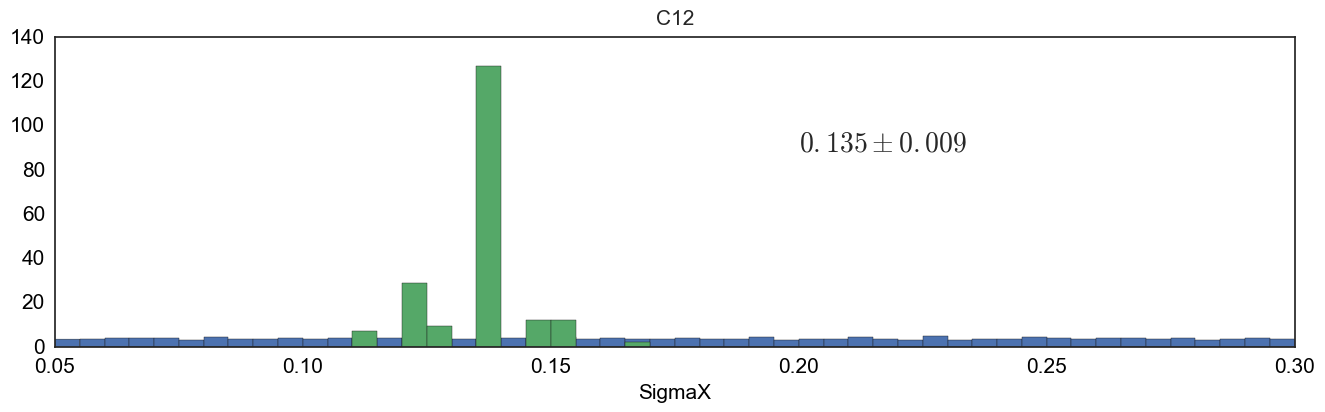

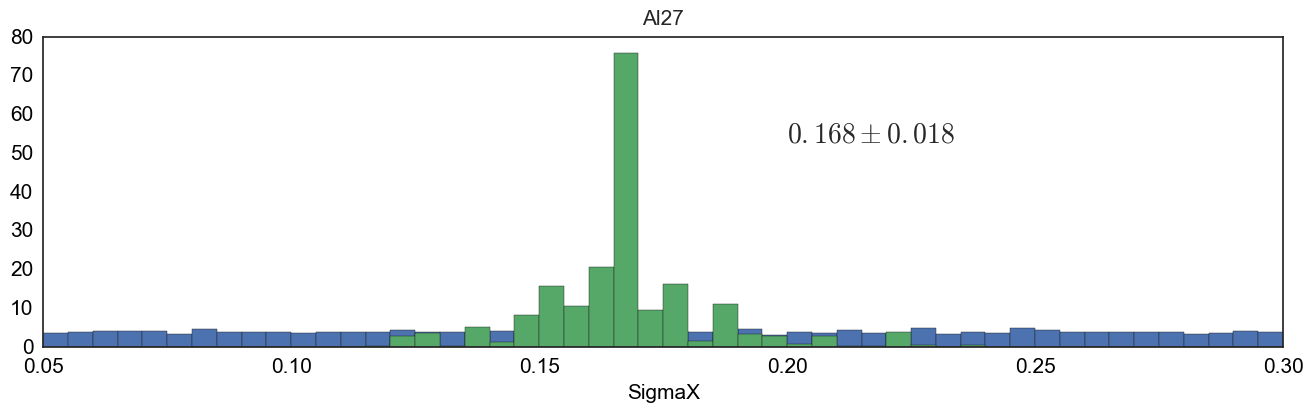

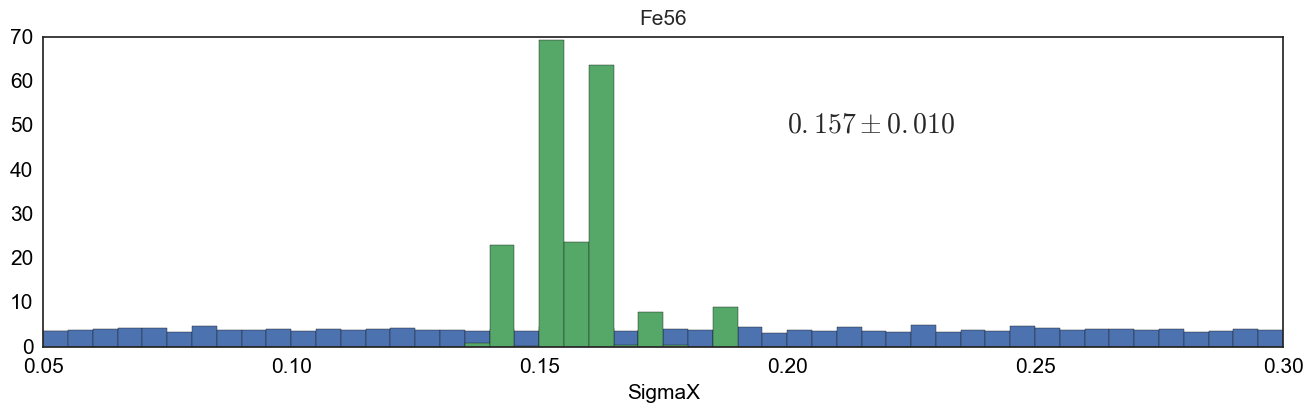

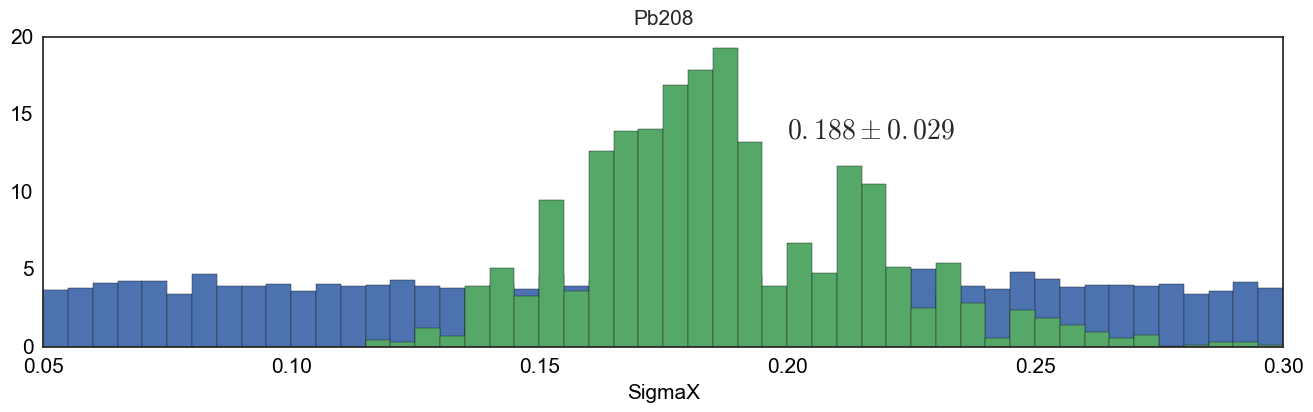

In [111]:
for target in ['C12','Al27','Fe56','Pb208']:
    fig,ax = plt.subplots(figsize=(16,4))
    for parameter in ['SigmaX']:
        var,w = parameter, 'ks_PvalTotal_'+target # 'ks_PvalTotalTransverse_'+target # 'ks_PvalTotal_'+target
        weights = sims[w]
        x = sims['gen_'+var]
        h,bins,_=plt.hist(x,bins=50,normed=1);
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1);            
            mu = np.average(sims['gen_'+var] , weights=weights)
            sigma = np.sqrt(np.average((sims['gen_'+var]-mu)**2, weights=weights))                                                                           
        set_axes(ax,x_label=var,fontsize=15)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.text(np.min(bins)+0.6*(np.max(bins)-np.min(bins)),0.7*np.max(h),'$%.3f\\pm%.3f$'%(mu,sigma),fontsize=20)

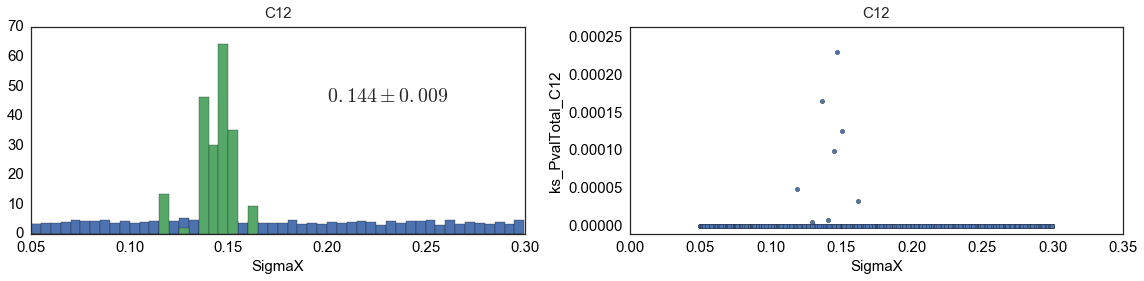

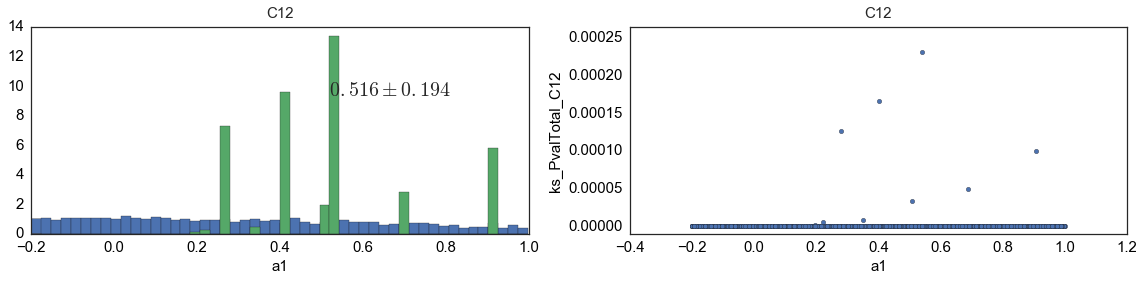

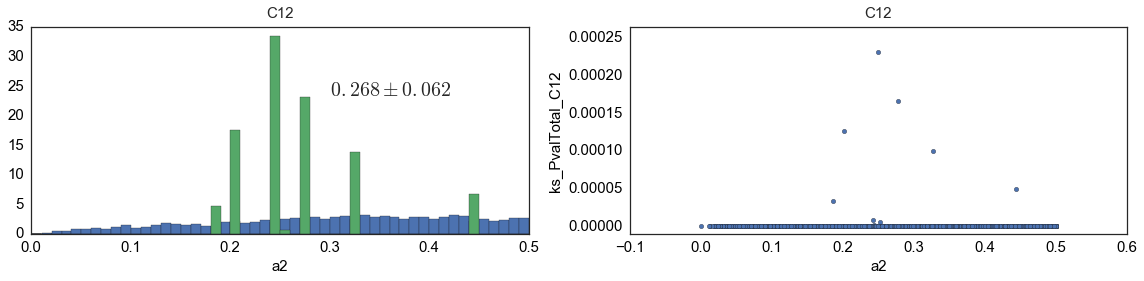

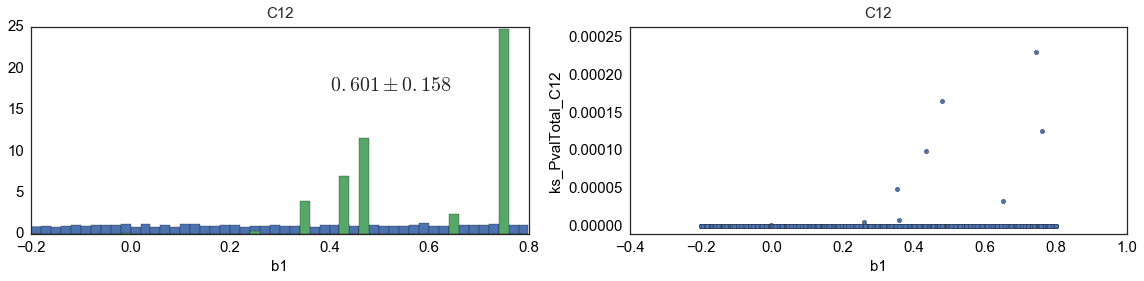

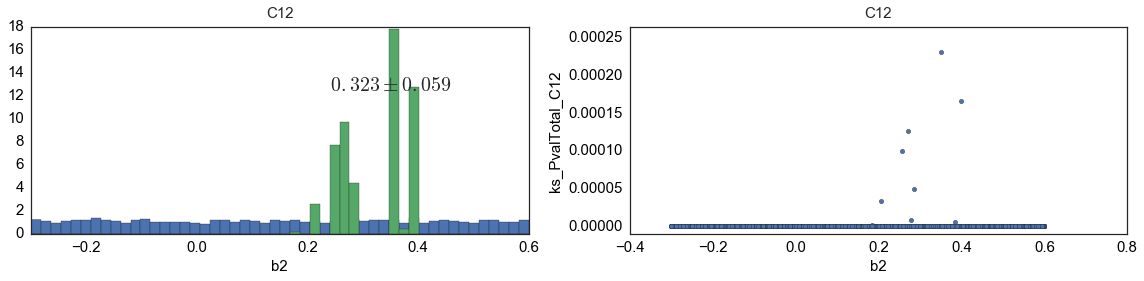

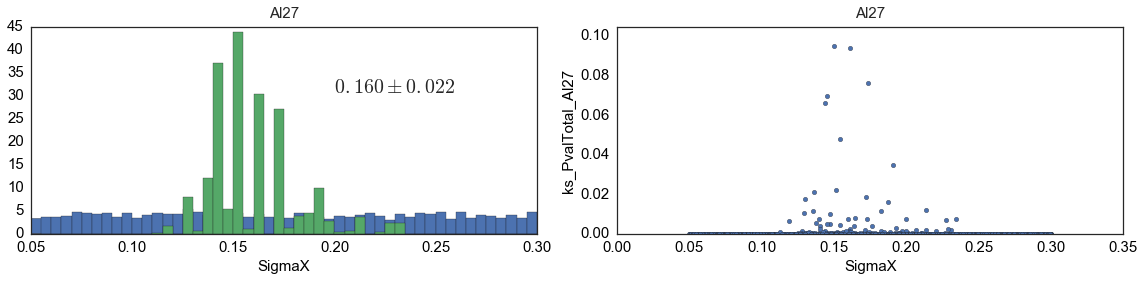

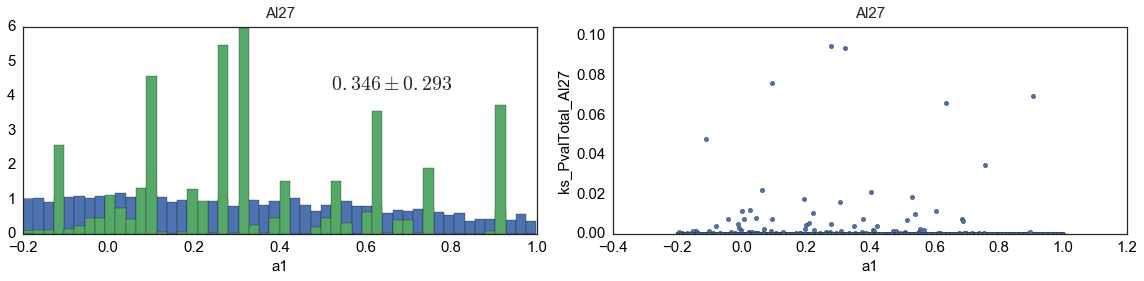

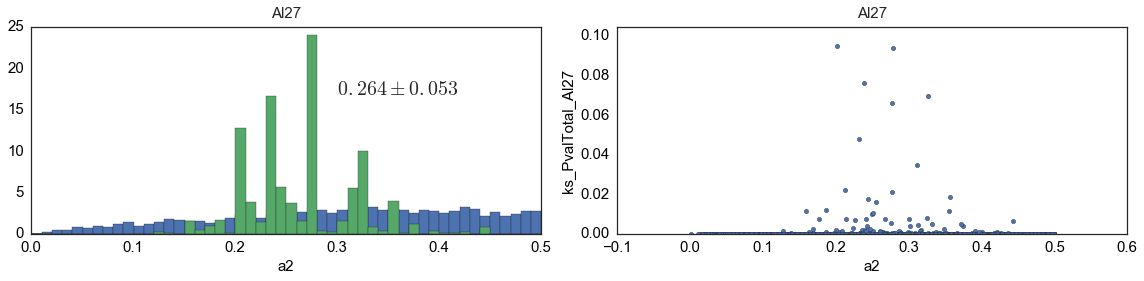

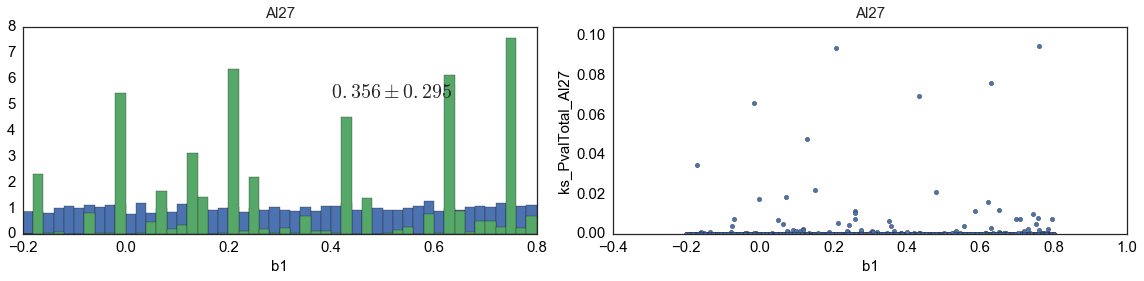

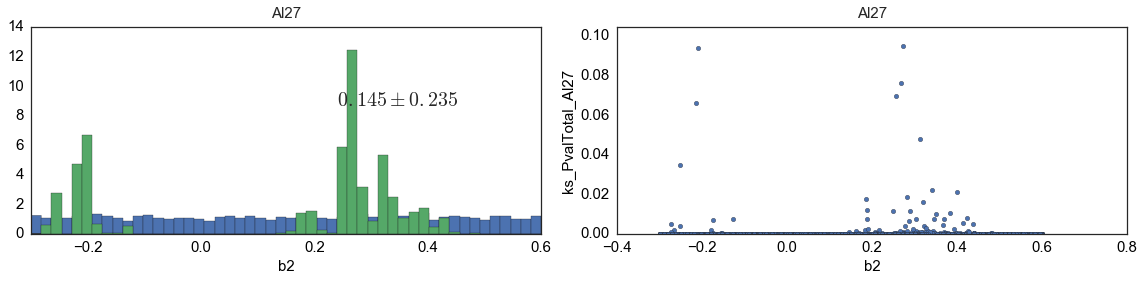

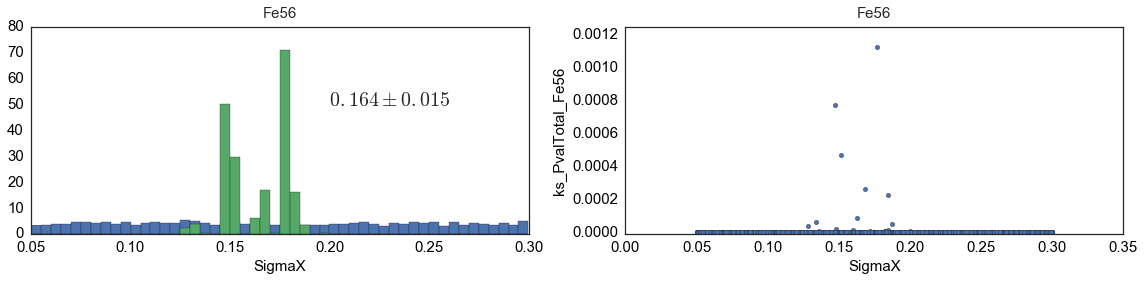

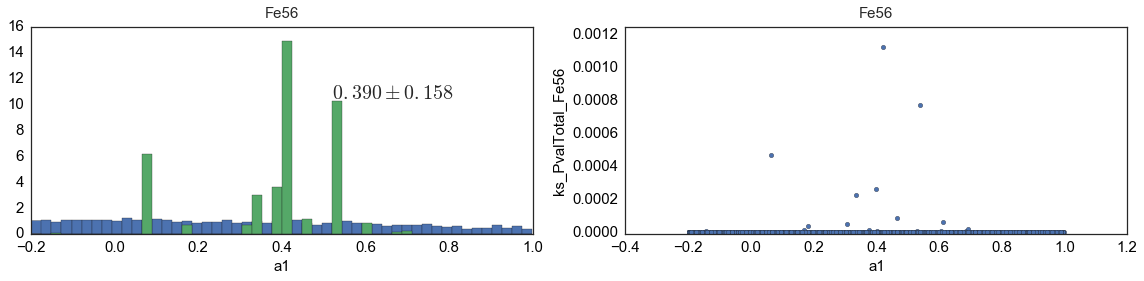

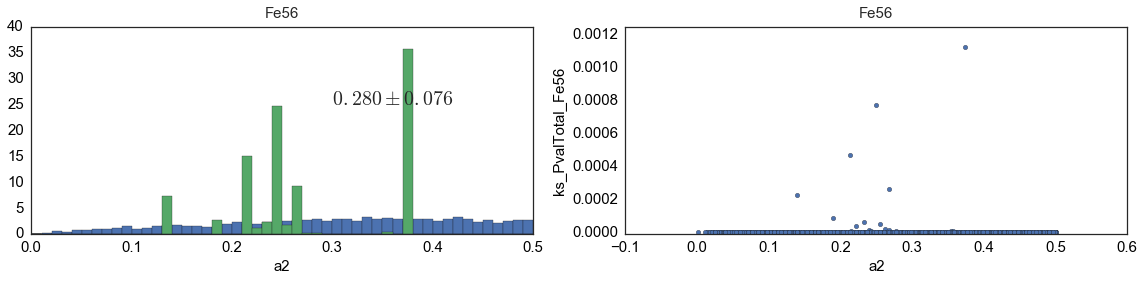

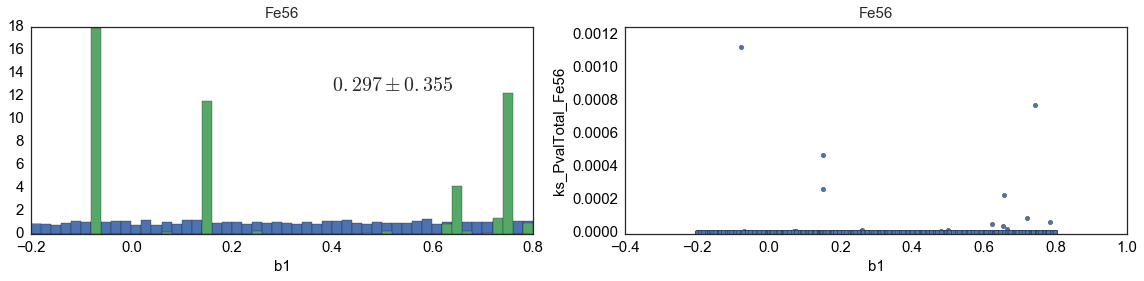

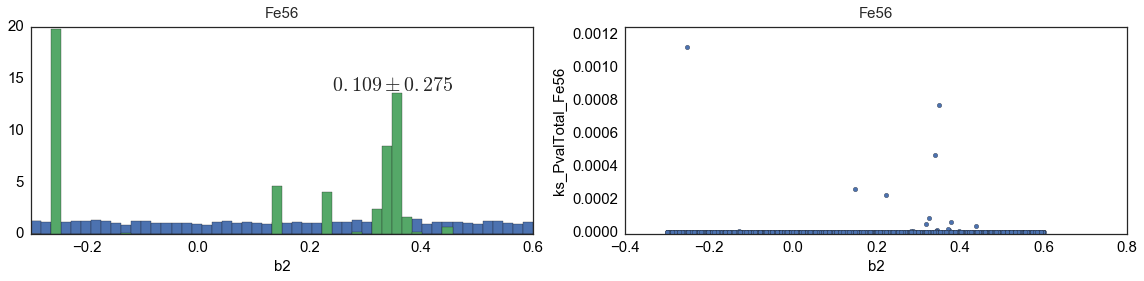

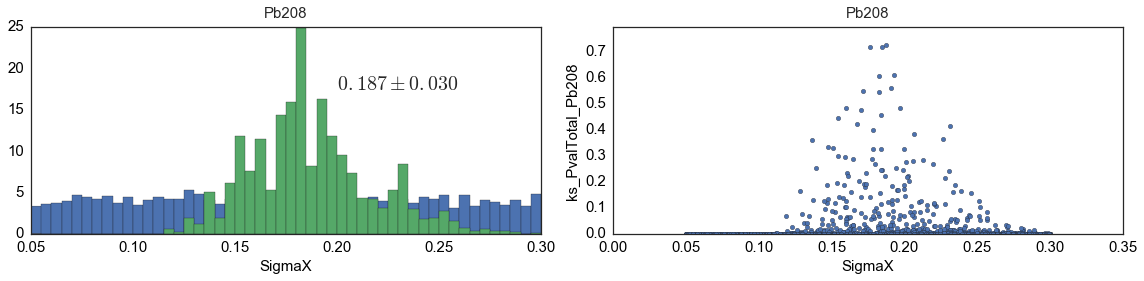

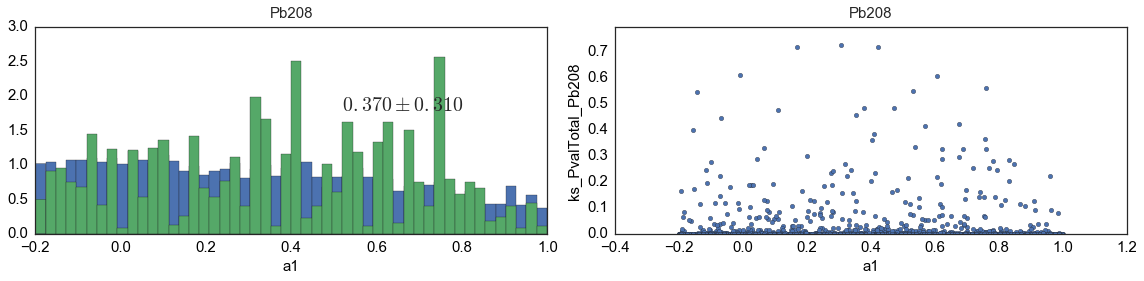

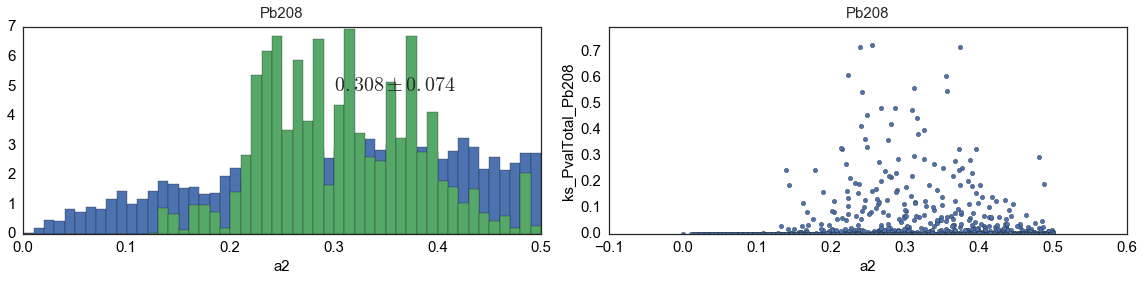

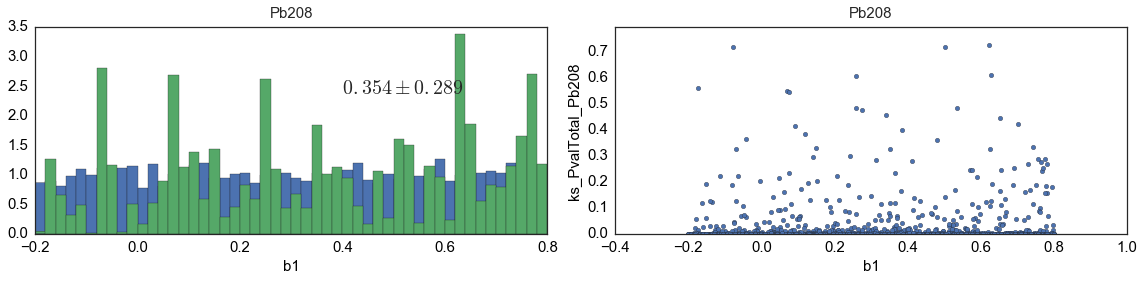

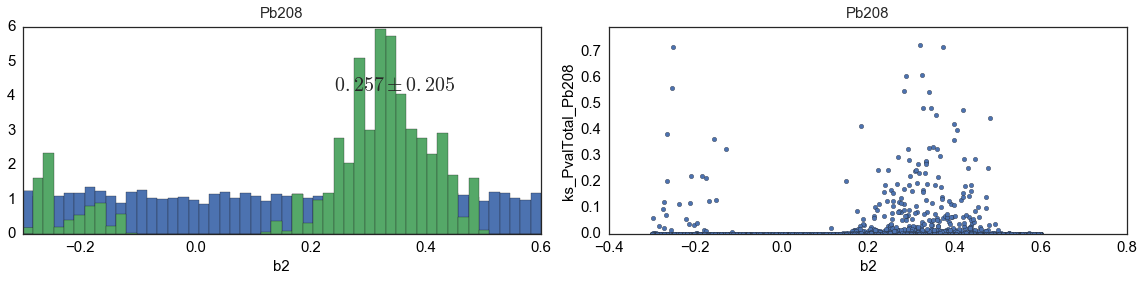

In [208]:
for target in ['C12','Al27','Fe56','Pb208']:
    for parameter in ['SigmaX','a1','a2','b1','b2']:
        var,w = parameter, 'ks_PvalTotal_'+target
        weights = sims[w]
        x = sims['gen_'+var]
        fig = plt.figure(figsize=(16,4))
        ax = fig.add_subplot(1,2,1)
        h,bins,_=plt.hist(x,bins=50,normed=1);
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1);            
            mu = np.average(sims['gen_'+var] , weights=weights)
            sigma = np.sqrt(np.average((sims['gen_'+var]-mu)**2, weights=weights))                                                                           
        set_axes(ax,x_label=var,fontsize=15)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.text(np.min(bins)+0.6*(np.max(bins)-np.min(bins)),0.7*np.max(h),'$%.3f\\pm%.3f$'%(mu,sigma),fontsize=20)
        ax = fig.add_subplot(1,2,2)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.scatter(x,weights);
        set_axes(ax,x_label=var,y_label=w,fontsize=15)
        ax.set_ylim(np.min(weights)-0.00001,1.1*np.max(weights)+0.00001)
        plt.tight_layout()

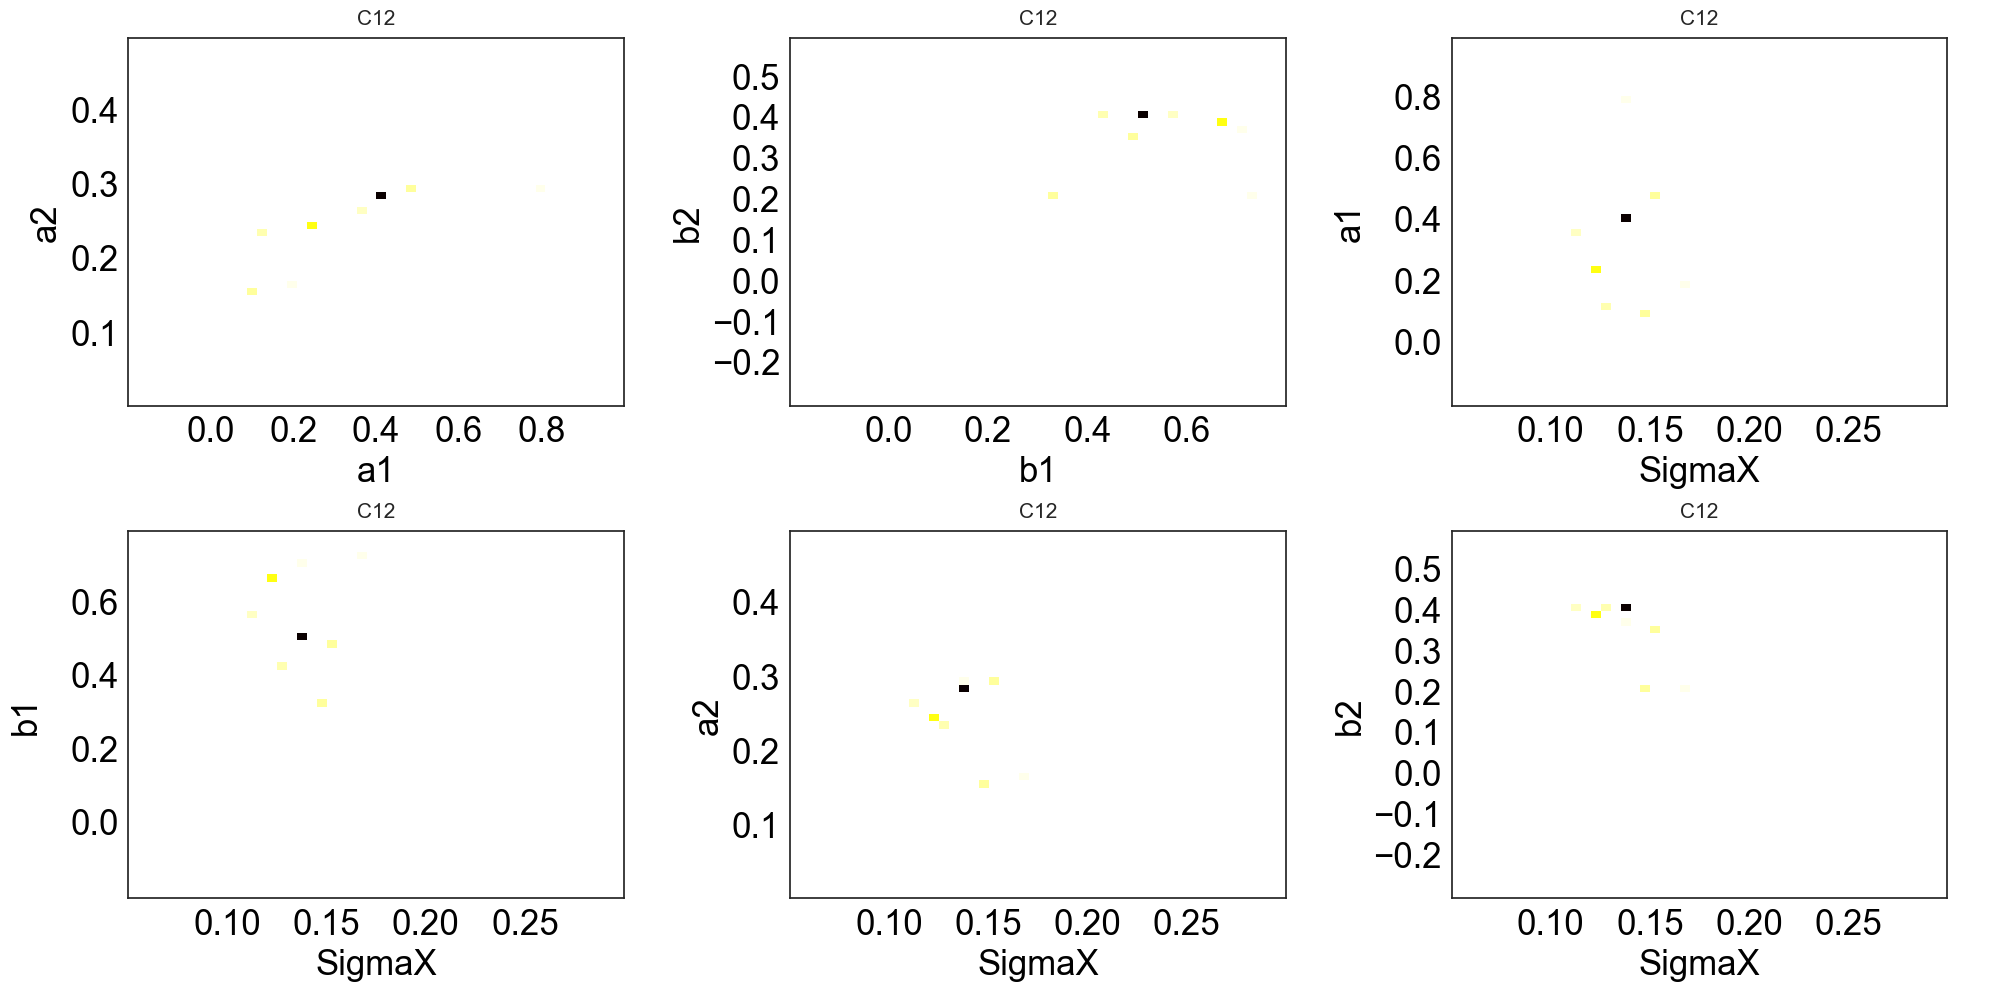

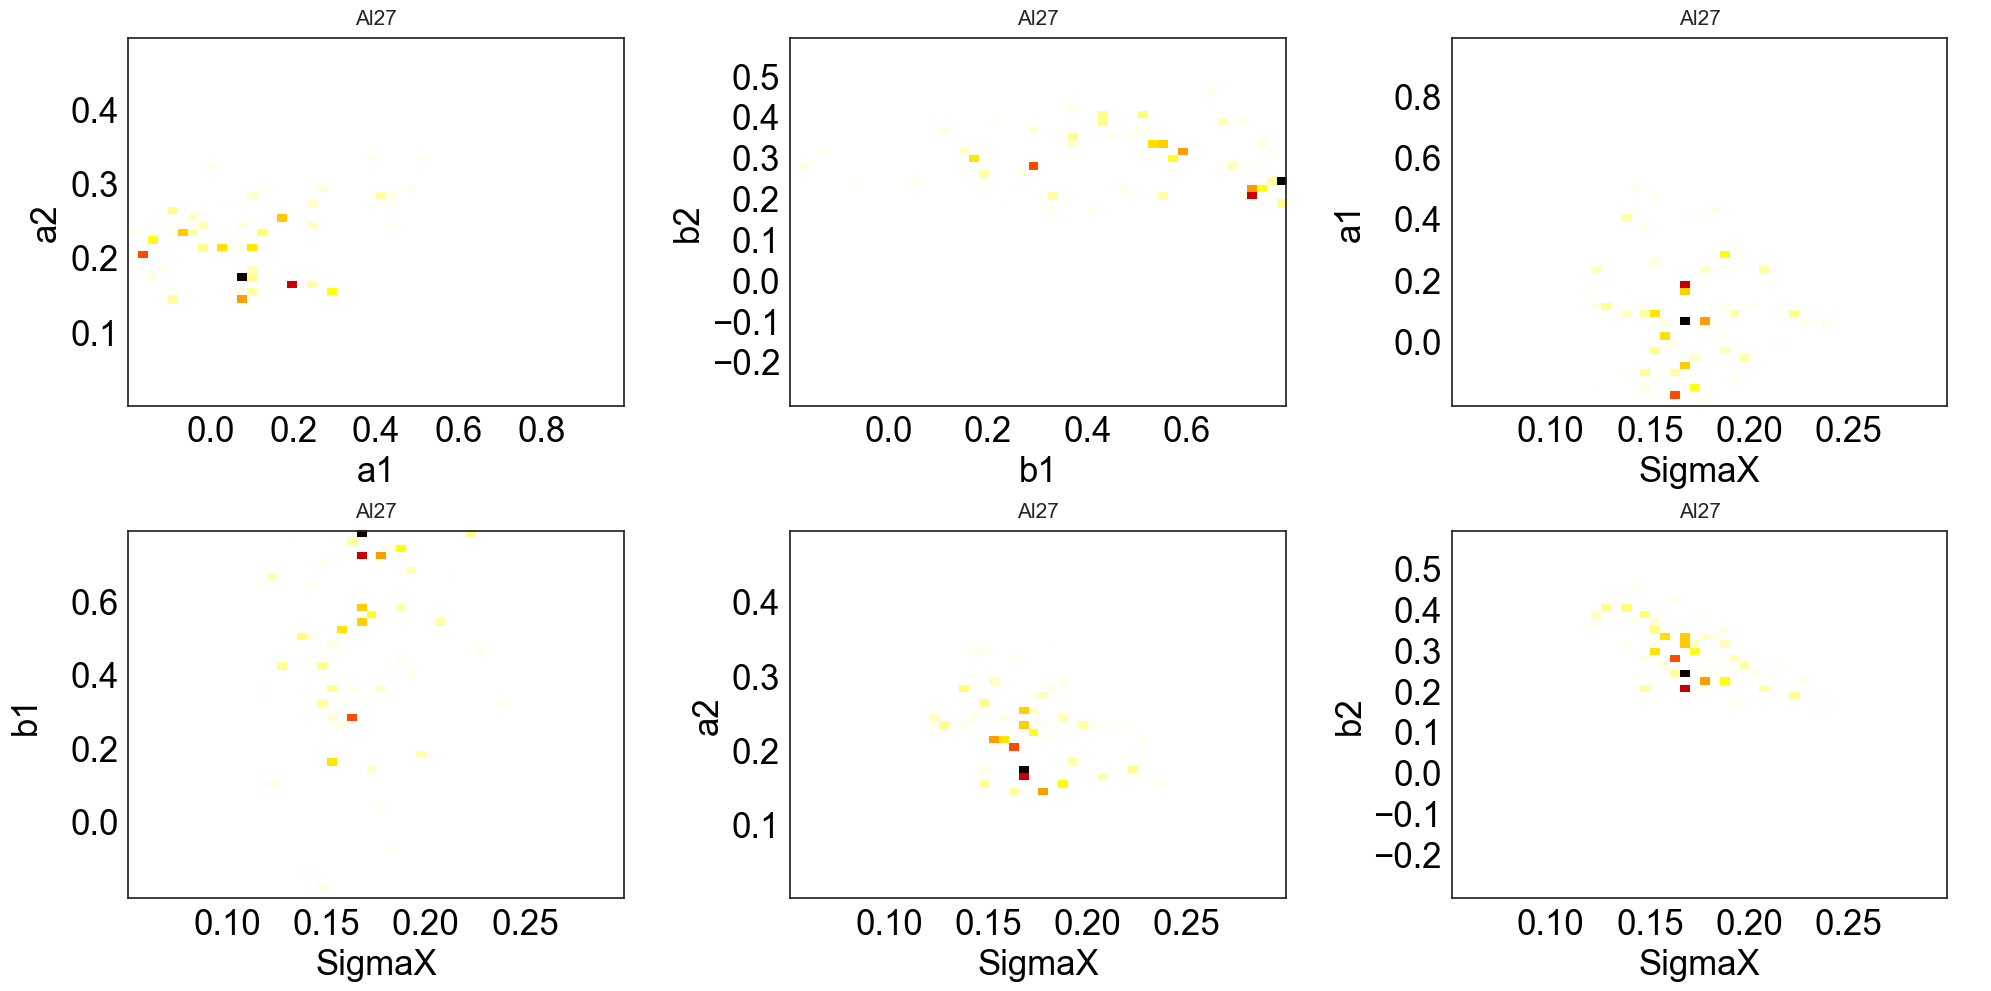

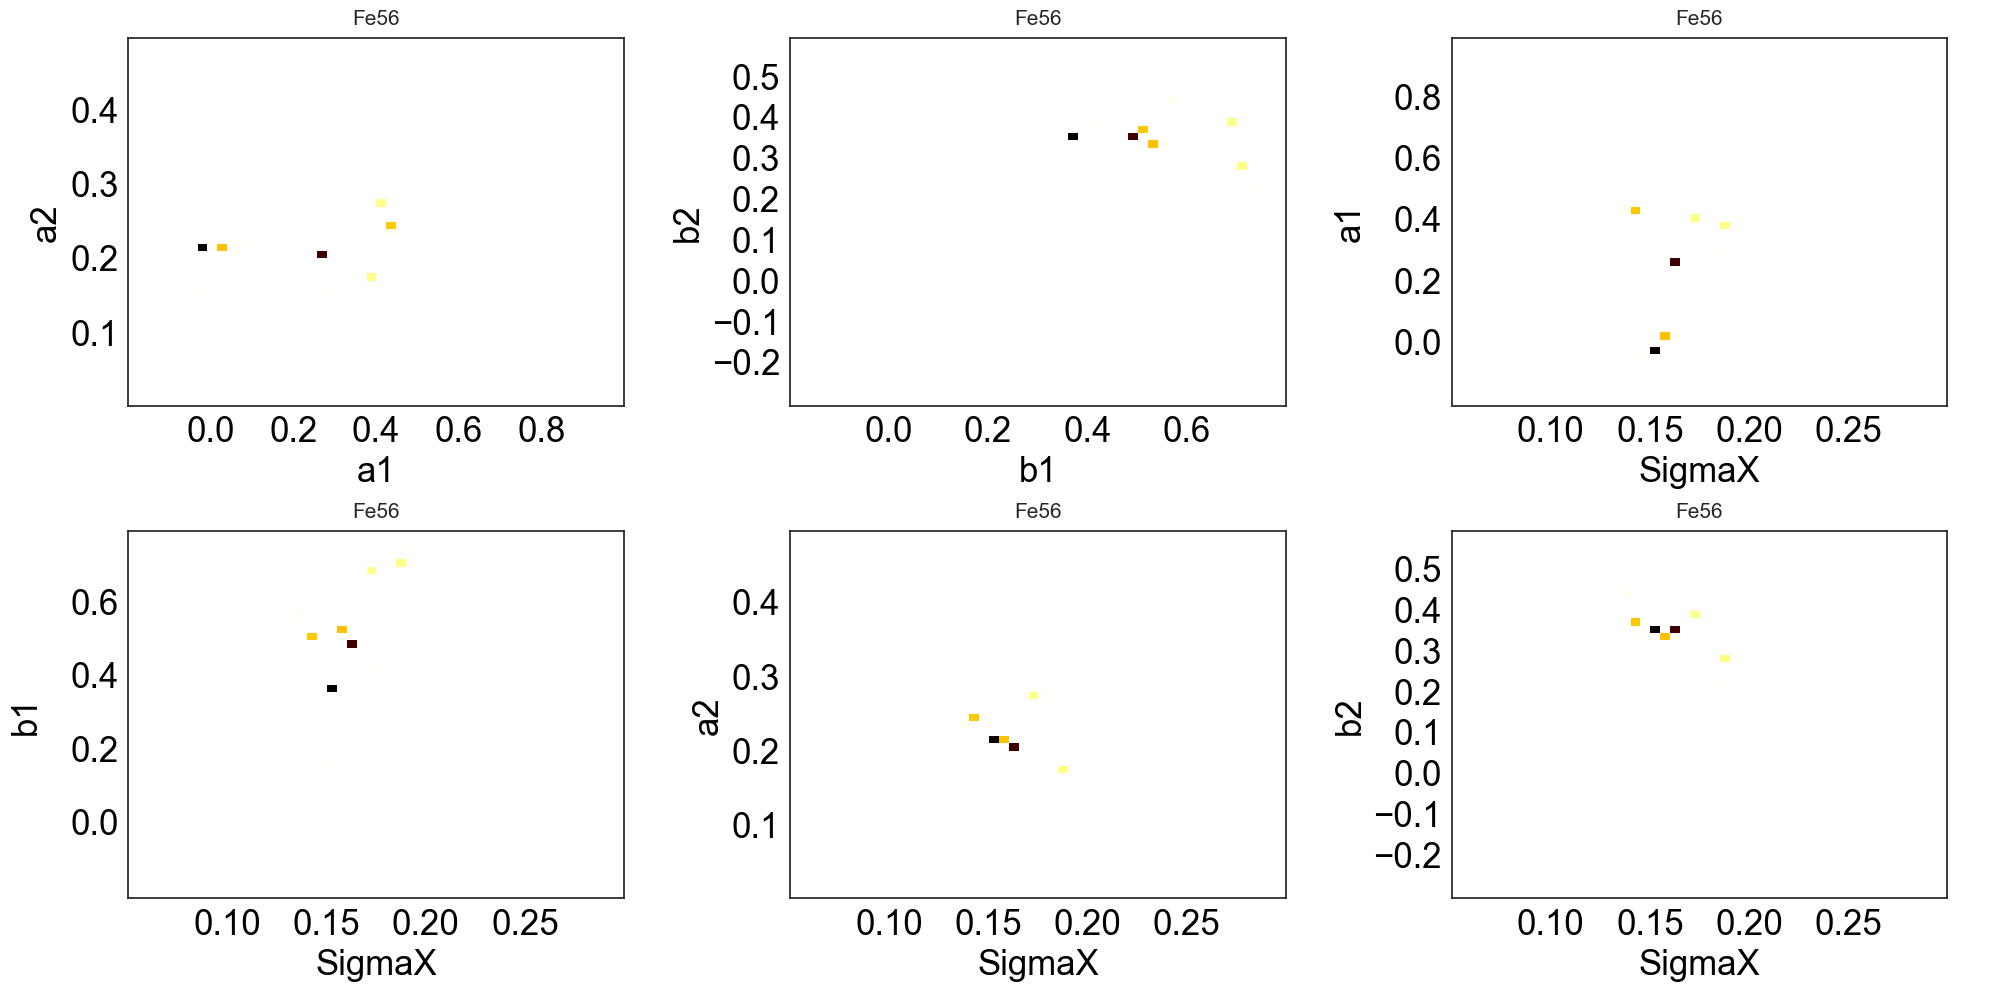

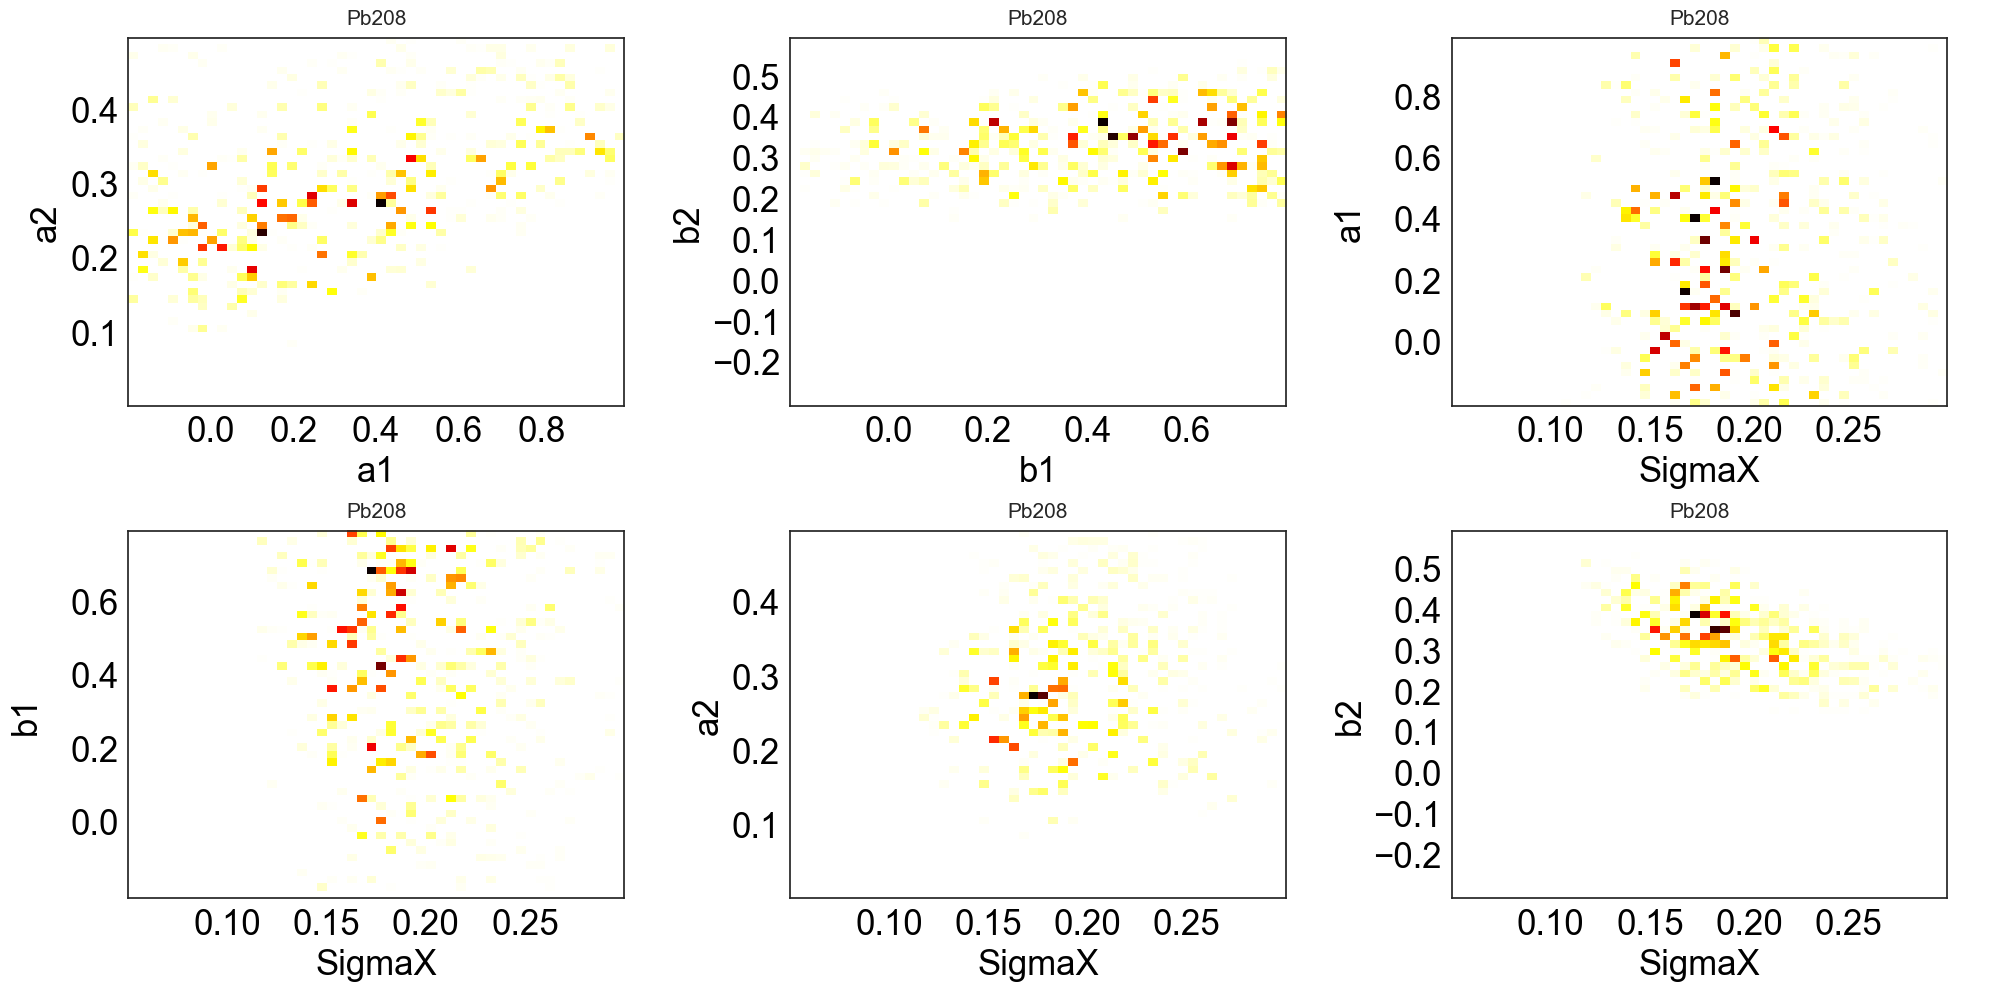

In [112]:
norm=''
for target in ['C12','Al27','Fe56','Pb208']:

    fig=plt.figure(figsize=(20,10))
    for i,parx,pary in zip(range(6),
                           ['a1','b1','SigmaX','SigmaX','SigmaX','SigmaX'],                         
                           ['a2','b2','a1','b1','a2','b2']):
        ax = fig.add_subplot(2,3,i+1)
        varx,vary,w = parx,pary, 'ks_PvalTotal_'+target
        plot_2d_hist(sims['gen_'+varx],sims['gen_'+vary],weights=sims[w],xlabel=parx,ylabel=pary,ax=ax,norm=norm)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.tight_layout()

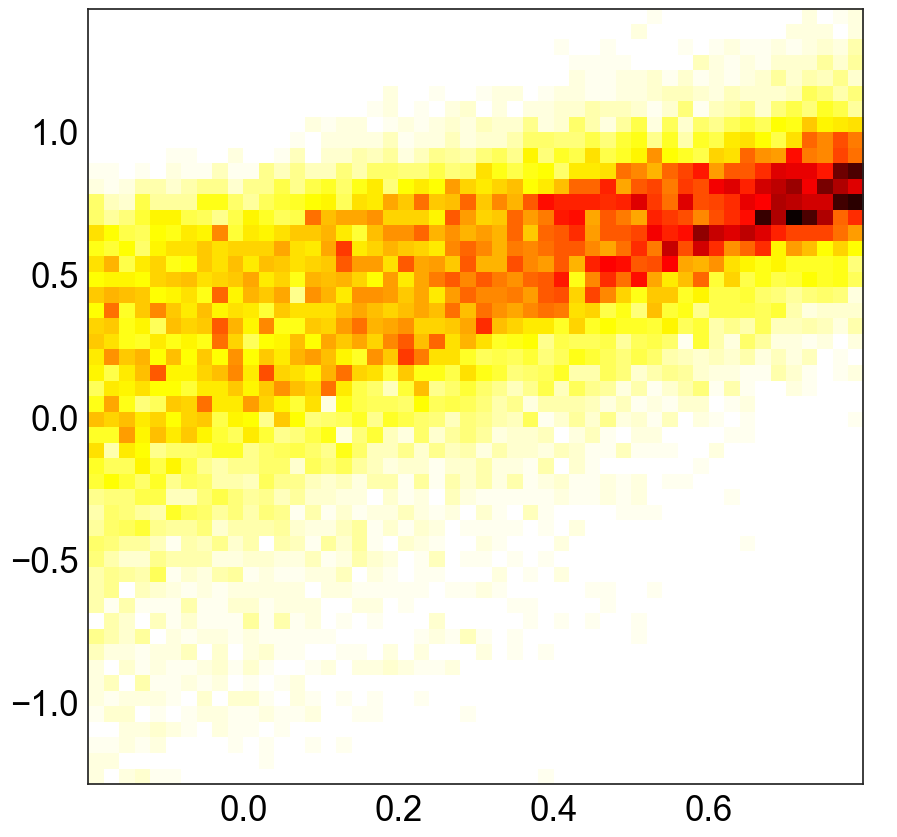

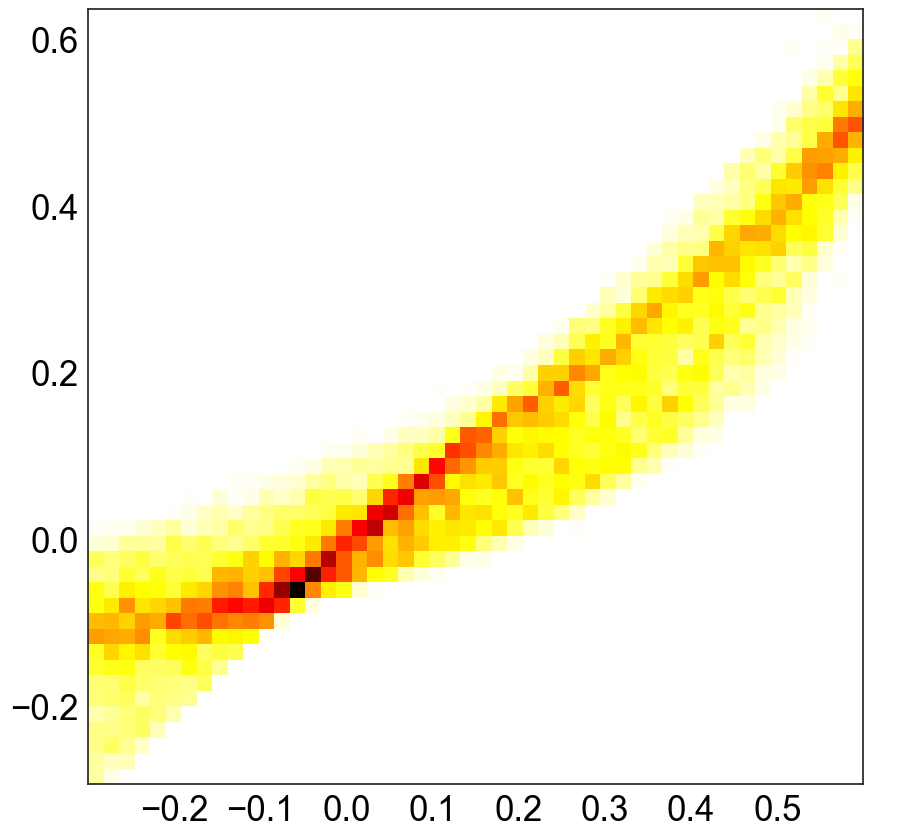

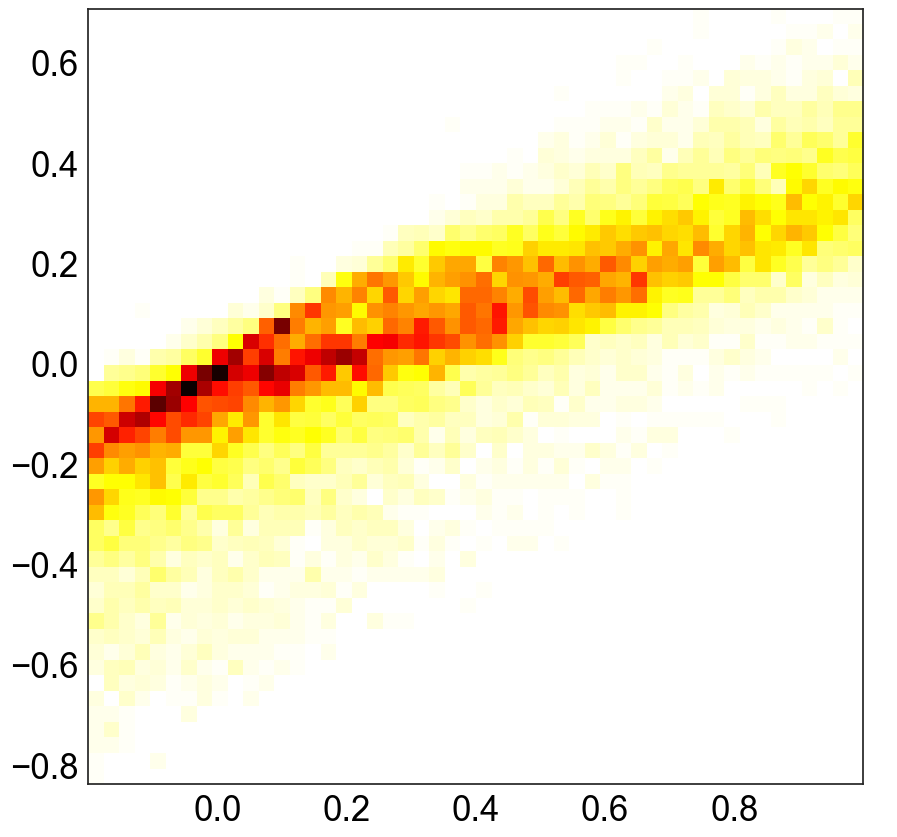

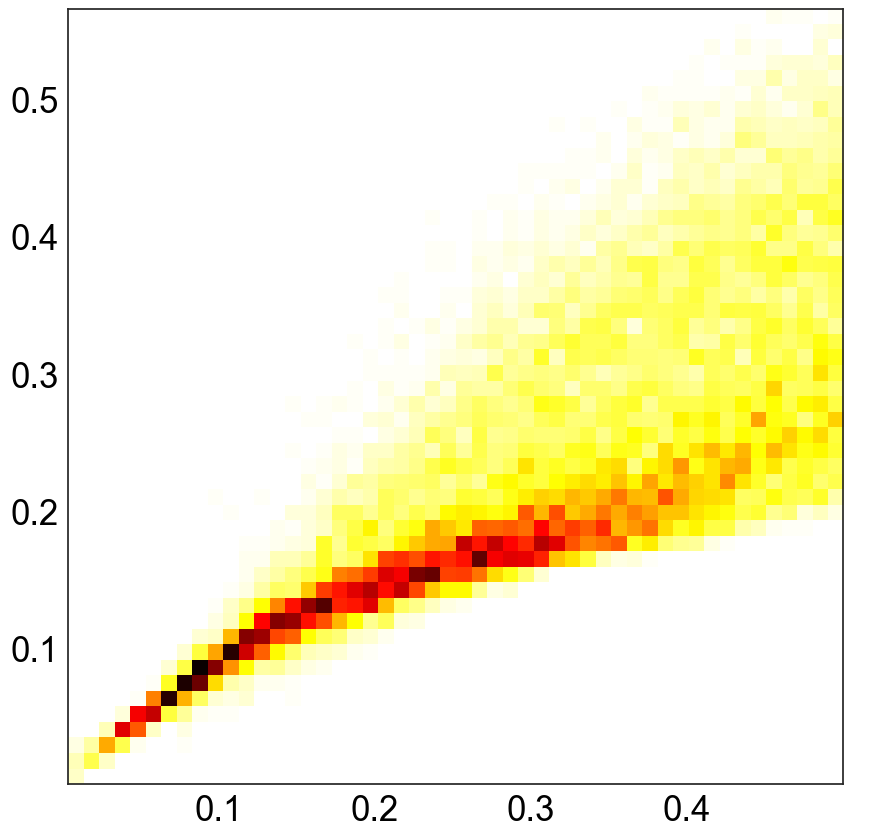

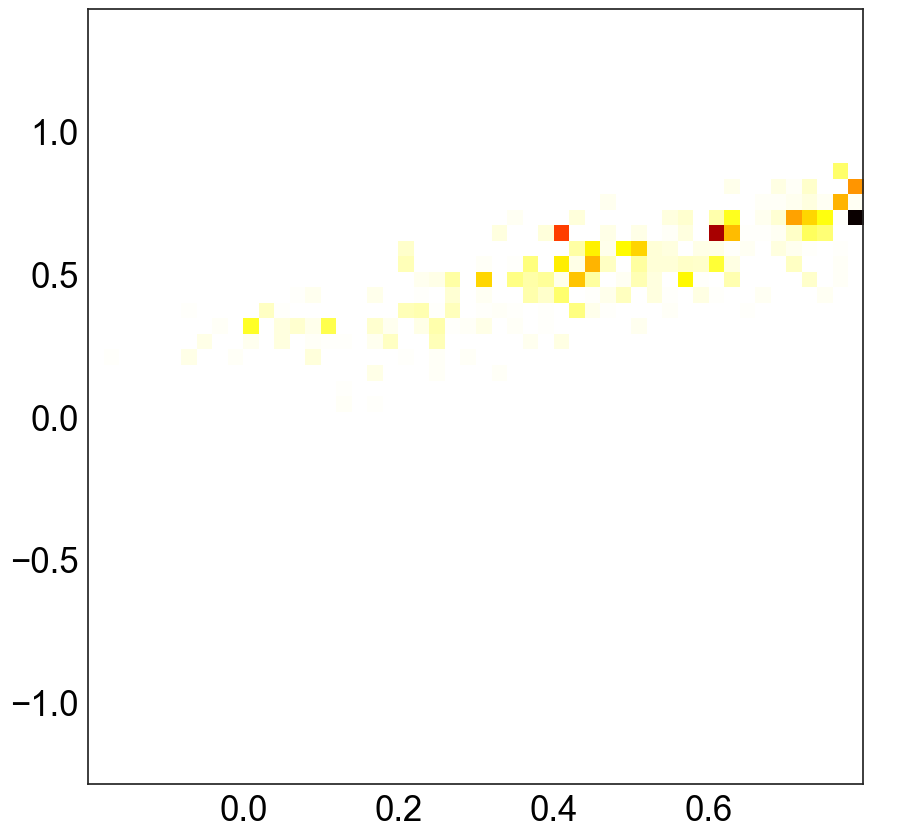

In [104]:
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1, norm='');
plot_2d_hist(sims[sims['rec_b2']>-100].gen_b2,sims[sims['rec_b2']>-100].rec_b2, norm='');
plot_2d_hist(sims[sims['rec_a1']>-100].gen_a1,sims[sims['rec_a1']>-100].rec_a1, norm='');
plot_2d_hist(sims[sims['rec_a2']>-100].gen_a2,sims[sims['rec_a2']>-100].rec_a2, norm='');
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1,weights=sims[sims['rec_b1']>-100].ks_PvalTotal_Al27, norm='');

[0.0, 0.99758600000000008]


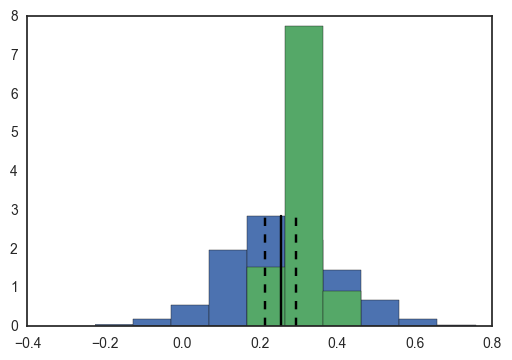

In [99]:
target,i_bin = 'Al27',4
# h,_,_=plt.hist(sims['recmean_z_pmiss_0.750_1.000'])
h,bins,_=plt.hist(sims['recmean_z_bin%d'%i_bin],normed=1)
plt.hist(sims['recmean_z_bin%d'%i_bin],weights=sims['ks_PvalTot_allPvals_'+target],bins=bins,normed=1)
# 12C mean of the distribution in this bin:
dataCMparameters = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/'+target+'_dataCMparameters.csv')
par, parErr = dataCMparameters.get_value(i_bin,'mean_z_unweighted'), dataCMparameters.get_value(i_bin,'mean_zErr_unweighted')
x = sims['ks_local_Pval_pcmZ_bin%d_%s'%(i_bin,target)]
print [np.min(x), np.max(x)]
plt.plot([par,par],[0,np.max(h)],color='black');
plt.plot([par+parErr,par+parErr],[0,np.max(h)],'--',color='black');
plt.plot([par-parErr,par-parErr],[0,np.max(h)],'--',color='black');